In [83]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as si
import numpy.linalg as npla


import pandas as pd
from scipy.sparse.csc import csc_matrix

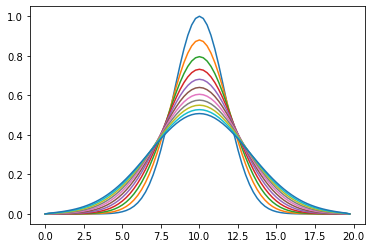

In [84]:
#this is my 2nd attempt at crank with the 1D heat equation

#variables
L=20
t0=0
tmax=2
x0=0
xmax=L
isteps=4*L
nsteps=10
dt=0.001
dx=xmax/isteps
k=L**2
r=(k*dt)/(2*(dx)**2)
sigma=L/12
x=np.zeros(isteps+1)

for i in range(isteps):
    xi=x0+(i+1)*dx
    x[i+1]=xi
    
T=np.zeros(isteps)

for i in range(1,isteps):#gives first array of T vs x
    xi=x0+(i)*dx
    Ti=np.exp((-1/2)*((xi-(L/2))**2)/(sigma)**2)
    T[i]=Ti

#make array of arrays of T
Tn=[]
Tn.append(T)

def CrankNicolson(T):#NEED TO FINISH WRITING THIS put in the inverse matrix
    a=-r
    b=(1+2*r)
    c=-r#these are also correct for the LHS
    RHS=np.zeros(isteps)
    for i in range(1,isteps-1):
        RHS[i]=r*T[i+1]+(1-2*r)*T[i]+r*T[i-1]#this is correct
    RHS[0]=r*T[1]
    RHS[isteps-1]=r*T[isteps-2]
    D=np.matrix(RHS).T#made matrix and made it vertical
    def tridiag(A, B, C, k1=-1, k2=0, k3=1):#tridiagonal matrix
        return np.diag(A, k1) + np.diag(B, k2) + np.diag(C, k3)
    A=[a]*(isteps-1); B = [b]*(isteps); C = [c]*(isteps-1)
    d=tridiag(A, B, C)
    I=npla.inv(d)#inverse matrix... this might be the issue..?
    T1=I*D
    T1=np.array(T1.T)[0]
    T1[0]=0
    T1[-1]=0
    return T1

plt.plot(x[0:isteps],T)

for n in range(nsteps):#run crank for all t and plot for each
    T=CrankNicolson(T)
    Tn.append(T)
    plt.plot(x[0:isteps],T)


plt.show()

In [85]:
#this is me figuring out how to make a matrix...
nsteps=5
r=nsteps
isteps=10
A=np.zeros((nsteps,nsteps))
A[0,1]=2

print(A)

a=-r
b=(1+2*r)
c=-r
e=np.zeros((isteps-1,isteps-1))
e[7:9]=[2]
e[0:7]=[0]
e=np.matrix(e).T
e[8:9]=[2]
e[1:8]=[0]
print(e)
def tridiag(A, B, C, k1=-1, k2=0, k3=1):#tridiagonal matrix
       return np.diag(A, k1) + np.diag(B, k2) + np.diag(C, k3)
A=[a]*(isteps-1); B = [b]*(isteps); C = [c]*(isteps-1)
d=tridiag(A, B, C)
d[0][isteps-1]=r
d[0][isteps-2]=r
d[isteps-1][0]=r
d[isteps-1][1]=r
print(d)


[[0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2.]]
[[11 -5  0  0  0  0  0  0  5  5]
 [-5 11 -5  0  0  0  0  0  0  0]
 [ 0 -5 11 -5  0  0  0  0  0  0]
 [ 0  0 -5 11 -5  0  0  0  0  0]
 [ 0  0  0 -5 11 -5  0  0  0  0]
 [ 0  0  0  0 -5 11 -5  0  0  0]
 [ 0  0  0  0  0 -5 11 -5  0  0]
 [ 0  0  0  0  0  0 -5 11 -5  0]
 [ 0  0  0  0  0  0  0 -5 11 -5]
 [ 5  5  0  0  0  0  0  0 -5 11]]


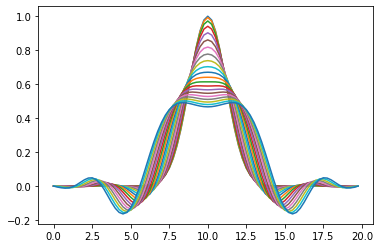

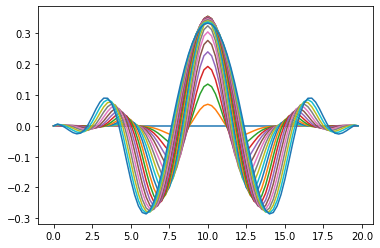

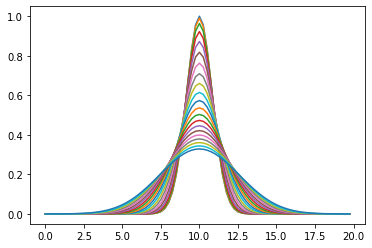

In [86]:


#this is my 2nd attempt at crank with the 1D heat equation

#variables
L=20
t0=0
tmax=2
x0=0
xmax=L
isteps=4*L
nsteps=20
dt=0.2
dx=xmax/isteps
k=1j
r=(dt)/(4*k*(dx)**2)
sigma=L/12
x=np.zeros(isteps+1)

for i in range(isteps):
    xi=x0+(i+1)*dx
    x[i+1]=xi
    
T=np.zeros(isteps,np.complex)

for i in range(1,isteps):#gives first array of T vs x
    xi=x0+(i)*dx
    Ti=np.exp((-1)*((xi-(L/2))**2)/(sigma)**2)
    T[i]=Ti


#make array of arrays of T
Tn=[]
Tn.append(T)


def CrankNicolson(T):#NEED TO FINISH WRITING THIS put in the inverse matrix
    a=-r
    b=(1+2*r)
    c=-r
    RHS=np.zeros(isteps,np.complex)
    for i in range(1,isteps-1):
        RHS[i]=r*T[i+1]+(1-2*r)*T[i]+r*T[i-1]
    RHS[0]=r*T[1]
    RHS[isteps-1]=r*T[isteps-2]
    D=np.matrix(RHS).T#made matrix for the RHS
    def tridiag(A, B, C, k1=-1, k2=0, k3=1):#tridiagonal matrix
        return np.diag(A, k1) + np.diag(B, k2) + np.diag(C, k3)
    A=[a]*(isteps-1); B = [b]*(isteps); C = [c]*(isteps-1)
    d=tridiag(A, B, C)
    d[0][isteps-1]=a
    d[0][isteps-2]=c
    d[isteps-1][0]=a
    d[isteps-1][1]=c
    I=npla.inv(d)#inverse matrix... this might be the issue..?
    T1=I*D
    T1=np.array(T1.T)[0]
    T1[0]=0
    T1[-1]=0
    return T1

plt.plot(x[0:isteps],np.real(T))# plots initial condition

for n in range(nsteps):#run crank for all t and plot for each plots real parts
    T=CrankNicolson(T)
    Tn.append(T)
    plt.plot(x[0:isteps],np.real(T))
    

plt.show()

for T in Tn:#Plots imaginary parts
    plt.plot(x[0:isteps],np.imag(T))

plt.show()

for T in Tn:#plots overall average
    plt.plot(x[0:isteps],np.abs(T)**2)
    
plt.show()

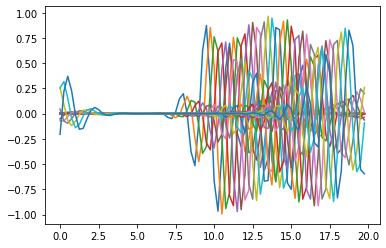

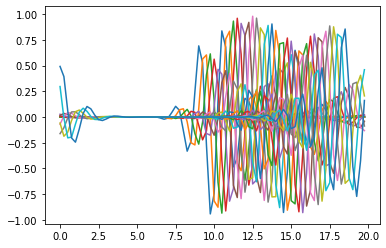

8.355427582103335
8.355427582103339
8.355427582103339
8.35542758210334
8.35542758210334
8.355427582103342
8.355427582103342
8.355427582103344
8.355427582103346
8.355427582103346
8.355427582103346
8.355427582103346
8.355427582103346
8.355427582103347
8.35542758210335
8.35542758210335
8.35542758210335
8.35542758210335
8.35542758210335
8.355427582103351
8.355427582103353


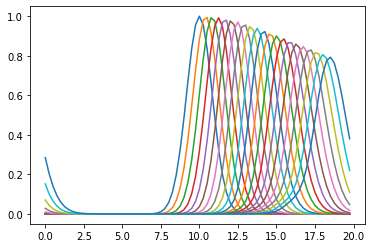

In [87]:
#attempt with periodic boundary conditions

#variables
L=20
t0=0
tmax=2
x0=0
xmax=L
isteps=4*L
nsteps=20
dt=0.2
dx=xmax/isteps
k=1j
r=(dt)/(4*k*(dx)**2)
sigma=L/12
x=np.zeros(isteps+1)

for i in range(isteps):
    xi=x0+(i+1)*dx
    x[i+1]=xi
    
T=np.zeros(isteps,np.complex)

for i in range(1,isteps):#gives first array of T vs x
    xi=x0+(i)*dx
    Ti=np.exp(-4*k*xi+(-1)*((xi-(L/2))**2)/(sigma)**2)
    T[i]=Ti


#make array of arrays of T
Tn=[]
Tn.append(T)


def CrankNicolson(T):#NEED TO FINISH WRITING THIS put in the inverse matrix
    a=-r
    b=(1+2*r)
    c=-r
    RHS=np.zeros(isteps,np.complex)
    for i in range(1,isteps-1):
        RHS[i]=r*T[i+1]+(1-2*r)*T[i]+r*T[i-1]
    RHS[0]=r*T[1]+(1-2*r)*T[0]+r*T[-1]
    RHS[isteps-1]=r*T[0]+(1-2*r)*T[-1]+r*T[-2]
    D=np.matrix(RHS).T#made matrix for the RHS
    def tridiag(A, B, C, k1=-1, k2=0, k3=1):#tridiagonal matrix
        return np.diag(A, k1) + np.diag(B, k2) + np.diag(C, k3)
    A=[a]*(isteps-1); B = [b]*(isteps); C = [c]*(isteps-1)
    d=tridiag(A, B, C)
    d[0][isteps-1]=a#added for periodic boundary conditions, extra terms in upper right and lower left
    d[isteps-1][0]=a
    I=npla.inv(d)
    T1=I*D
    T1=np.array(T1.T)[0]
    return T1

plt.plot(x[0:isteps],np.real(T))# plots initial condition

for n in range(nsteps):#run crank for all t and plot for each plots real parts
    T=CrankNicolson(T)
    Tn.append(T)
    plt.plot(x[0:isteps],np.real(T))
    

plt.show() 

for T in Tn:#Plots imaginary parts
    plt.plot(x[0:isteps],np.imag(T))

plt.show()

for T in Tn:#plots overall average
    plt.plot(x[0:isteps],np.abs(T)**2)
    print(np.sum(np.abs(T)**2))#checking for unitarity
plt.show()



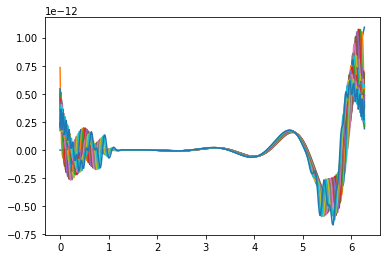

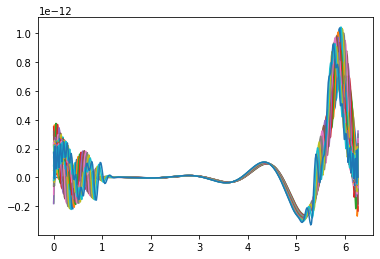

3.062501848227708e-23
3.062501848480228e-23
3.062501848901083e-23
3.0625018494902585e-23
3.0625018502477253e-23
3.062501851173458e-23
3.0625018522674203e-23
3.0625018535295715e-23
3.0625018549598566e-23
3.0625018565582186e-23
3.0625018583245964e-23
3.062501860258923e-23
3.062501862361117e-23
3.0625018646310965e-23
3.06250186706877e-23
3.0625018696740437e-23
3.062501872446816e-23
3.062501875386975e-23
3.062501878494404e-23
3.062501881768978e-23
3.062510369286599e-23


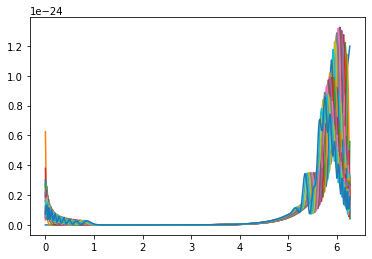

In [88]:
# trying at particle on ring system with periodic boundary cause ring and vector potential


#variables
L=100
Omeg0=1
Omeg1=np.pi
eps=0#1
ntild=1#00
t0=0
tmax=2
x0=0
xmax=2*np.pi
isteps=4*L
nsteps=20
dt=0.001
dx=xmax/isteps
k=1j
r=(dt)/(4*k*(dx)**2)
sigma=L/12
x=np.zeros(isteps+1)
drv=np.zeros(nsteps+1)
t=np.zeros(nsteps+1)

for i in range(isteps):#x array
    xi=x0+(i+1)*dx
    x[i+1]=xi

for n in range(nsteps):#t array
    tn=t0+(n+1)*dt
    t[n+1]=tn

for n in range(nsteps):#drv array, drv is drive force
    tn=t0+(n+1)*dt
    drvn=np.cos(Omeg1*tn)
    drv[n]=drvn

T=np.zeros(isteps,np.complex)

for i in range(1,isteps):#gives first array of T vs x
    xi=x0+(i)*dx
    Ti=np.exp(-4*k*xi+(-1)*((xi-(L/2))**2)/(sigma)**2)
    T[i]=Ti

#make array of arrays of T
Tn=[]
Tn.append(T)

a=np.zeros(nsteps)
b=np.zeros(nsteps)
c=np.zeros(nsteps)
a_1=np.zeros(nsteps)
b_1=np.zeros(nsteps)
c_1=np.zeros(nsteps)

def a(a,drv,x):
    a1=((1/(ntild*2*(dx)**2))-((k*eps*(Omeg0/Omeg1)*drv[n])/(dx)))
    return a1
def b(b,drv,x):
    b1=((k/(Omeg0*dt))+(1/(ntild*(dx)**2))+(eps**2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n])**2/2)-(ntild*np.cos(x[i])/2))
    return b1
def c(c,drv,x):
    c1=((1/(ntild*2*(dx)**2))+((k*eps*(Omeg0/Omeg1)*drv[n])/(dx)))
    return c1

def a_1(a_1,drv,x):
    a_11=((1/(ntild*2*(dx)**2))-((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dx)))
    return a_11
def b_1(b_1,drv,x):
    b_11=((k/(Omeg0*dt))-(1/(ntild*(dx)**2))-(eps**2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n+1])**2/2)+(ntild*np.cos(x[i])/2))
    return b_11
def c_1(c_1,drv,x):
    c_11=((1/(ntild*2*(dx)**2))+((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dx)))
    return c_11

def CrankNicolson(T,n):#NEED TO FINISH WRITING THIS put in the inverse matrix
    RHS=np.zeros(isteps,np.complex)
    for i in range(-1,isteps-1):#boudary conditions taken here?
        temp1=-a(a,drv,x)
        temp2=b(b,drv,x)
        temp3=-c(a,drv,x)
        RHS[i]=temp1*T[i+1]+temp2*T[i]+temp3*T[i-1]#boundary conditions here?
    D=np.matrix(RHS).T#made matrix for the RHS ^there is a syntax error here and i dont know why
    d=np.zeros((isteps,isteps),np.complex)
    for i in range(isteps):
        d[i,i]=b_1(b_1,drv,x)
        d[i-1,i]=c_1(c_1,drv,x)
        d[i,i-1]=a_1(a_1,drv,x)
    d[0][isteps-1]=a_1(a_1,drv,x)#added for periodic boundary conditions, extra terms in upper right and lower left
    d[isteps-1][0]=c_1(c_1,drv,x)
    d=np.matrix(d)
    I=npla.inv(d)
    T1=I*D
    T1=np.array(T1.T)[0]
    return T1

plt.plot(x[0:isteps],np.real(T))# plots initial condition

for n in range(nsteps):#run crank for all t and plot for each plots real parts                                                                  
    T=CrankNicolson(T,n)
    Tn.append(T)
    plt.plot(x[0:isteps],np.real(T))
    
plt.show() 

for T in Tn:#Plots imaginary parts
    plt.plot(x[0:isteps],np.imag(T))

plt.show()

for T in Tn:#plots overall average
    plt.plot(x[0:isteps],np.abs(T)**2)
    print(np.sum(np.abs(T)**2))#checking for unitarity
plt.show()

In [89]:
#playing with matricies to see how these work
isteps=20
d=np.zeros((isteps,isteps))
d[0,0]=2;d[0,1]=3
d[1,0]=1;d[1,1]=2;d[1,2]=3
print(d)
a=2
b=3
d=np.zeros((isteps,isteps))
for i in range(isteps):
    d[i,i]=b
    d[i,i-1]=a
    d[i-1,i]=-a
d=np.matrix(d)
print(d)

[[2. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

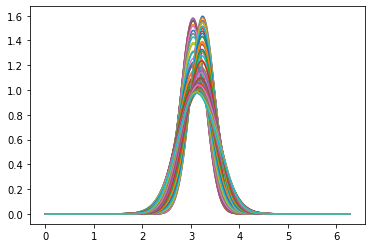

3.2415926535897923


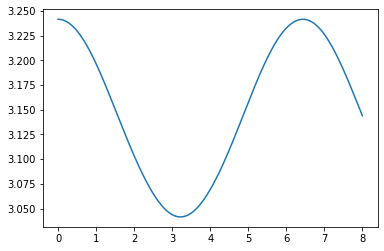

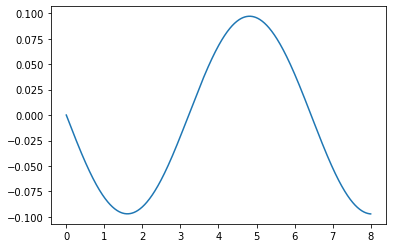

In [90]:
#Particle on ring Dimensionless


#variables
Omeg0=1.0
Omeg1=1.0
eps=0.0
ntild=10#ntild = 1 is quantum, ntild>>1 is classical
dt=0.01
nsteps=800
isteps=800

t0=0
theta0=np.pi+0.1
thetamax=np.pi*2
k=1j

#dependent variables
dtheta=thetamax/isteps
sigma=0.5

#initial arrays 
theta=np.zeros(isteps)
drv=np.zeros(nsteps+1)
t=np.zeros(nsteps+1)
   
for n in range(nsteps+1):#t,drv array, drv is drive force
    tn=t0+(n)*dt
    t[n]=tn
    drvn=np.cos(Omeg1*tn)
    drv[n]=drvn

T=np.zeros(isteps,np.complex)#wave packet array

for i in range(0,isteps):#theta,initial wave packet array T
    thetai=(i)*dtheta
    theta[i]=thetai
    Ti=np.exp((-0.0*k*thetai)+(-1)*((thetai-theta0)**2)/(sigma)**2)
    T[i]=Ti
    
#probibility here, to normalize
Total=np.sum(np.abs(T)**2)*dtheta
T=T/(np.sqrt(Total))
#make array of arrays of T
Tn=[]
Tn.append(T)

#definitions of coeffients
def a(drv,theta):
    a1=((1/(ntild*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return a1
def b(drv,theta):
    b1=((k/(Omeg0*dt))+(1/(ntild*(dtheta)**2))+((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n])**2/4)+(ntild*np.cos(theta)/4))#cos has flipped signs, fix this and correct the potential
    return b1 
def c(drv,theta):
    c1=((1/(ntild*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return c1

def a_1(drv,theta):
    a_11=((1/(ntild*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return a_11
def b_1(drv,theta):
    b_11=((k/(Omeg0*dt))-(1/(ntild*(dtheta)**2))-((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n+1])**2/4)-(ntild*np.cos(theta)/4))#cos has flipped signs, fix this and correct the potential
    return b_11
def c_1(drv,theta):
    c_11=((1/(ntild*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return c_11

def CrankNicolson(T,n):#Crank nicolson solver with periodic boundary conditions
    RHS=np.zeros(isteps,np.complex)#RHS
    for i in range(-1,isteps-1):
        temp1=-a(drv,theta[i])
        temp2=b(drv,theta[i])
        temp3=-c(drv,theta[i])
        RHS[i]=temp1*T[i+1]+temp2*T[i]+temp3*T[i-1]
    D=np.matrix(RHS).T#made matrix for the RHS
    d=np.zeros((isteps,isteps),np.complex)#LHS
    for i in range(-1,isteps-1):
        d[i,i]=b_1(drv,theta[i])
        d[i,i+1]=a_1(drv,theta[i])
        d[i,i-1]=c_1(drv,theta[i])
    d=np.matrix(d)#made matrix for LHS
    I=npla.inv(d)#matrix inversion using linear algebra 
    T1=I*D
    T1=np.array(T1.T)[0]#add to array of T
    return T1

#plt.plot(theta,np.real(T))# plots initial condition
#Run for all t
for n in range(nsteps):#Plots real parts                                                                  
    T=CrankNicolson(T,n)
    Tn.append(T)
 #   plt.plot(theta,np.real(T))
    
#plt.show() 

#for T in Tn:#Plots imaginary parts
  #  plt.plot(theta,np.imag(T))

#plt.show()

#for T in Tn:#plots overall average
   # plt.plot(theta,np.abs(T)**2)
   #print(np.sum(np.abs(T)**2)*dtheta)#checking for unitarity

for n in range(0,nsteps,10):
    plt.plot(theta,np.abs(Tn[n])**2)
    
#plt.plot(theta,np.abs(Tn[0])**2)
plt.show()

#Expecatation values

def position(theta,T):#calculates expectation value
    TA=0.
    for i in range(isteps):
        TA=TA+theta[i]*(np.abs(T[i])**2)*dtheta
    return TA

xbar=np.zeros(nsteps+1)
for n in range(nsteps+1):
    xbar[n]=np.real(position(theta,Tn[n]))
    
print(xbar[0])
plt.plot(t,xbar)
plt.show()

Exp_momentum=np.zeros((nsteps+1,2),np.complex)#angular momentum value, this works as long as Omeg0=1, which it does

def momentum(T):#calculates expectation value
    P=0.
    for i in range(-1,isteps-1):
        P=P+(2)*(-k)*(Omeg0/ntild)*np.conj(T[i])*((T[i+1]-T[i-1])/(2*dtheta))*dtheta
    return(P)

pbar=np.zeros((nsteps+1),np.complex)
#
for n in range(nsteps+1):
    pbar[n]=np.real(momentum(Tn[n]))
    Exp_momentum[n,0]=t[n]#time
    Exp_momentum[n,1]=momentum(Tn[n])#expectation value of momentum

Exp_momentum=np.matrix(Exp_momentum)#table showing time and expectation value
#print(pbar)
plt.plot(t,pbar)
plt.show()

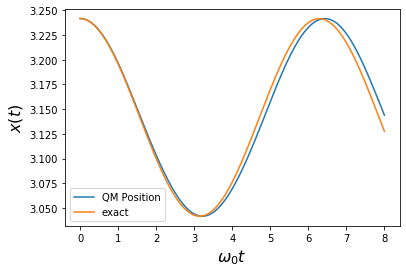

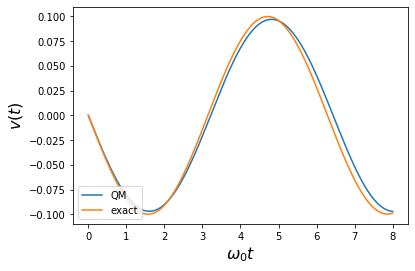

1.0


In [91]:
#exact value of pendulum
time=(nsteps)*dt
x0=xbar[0]
v0=0.0
totalTime=time
xdot=np.zeros(2)

def ode_RHS(t, x):
    #xdot=np.zeros(2)
    xdot[0]=x[1]
    xdot[1]=-Omeg0**2*np.sin((1)*x[0]-np.pi)+eps*np.sin(Omeg1*t)
    return xdot

ICs=[x0,v0]
exact = si.solve_ivp(ode_RHS, (0.,totalTime),ICs,rtol=1e-6,
                        atol=1e-8,t_eval=np.linspace(0,totalTime,1001))
t=np.arange(0,4,0.4)

x1=np.linspace(0,totalTime,len(exact.t))
x2=np.linspace(0,totalTime,len(xbar))
x3=np.linspace(0,totalTime,len(t))

xbar=np.array(xbar)

SIN=np.linspace(0,totalTime,len(exact.t))

#x-axis is time, y-axis is theta
plt.plot(x2,xbar,label='QM Position')
plt.plot(x1,exact.y[0],label='exact')
#plt.plot(SIN,-(1/ntild)*np.cos((1)*SIN-np.pi)+np.pi,label='sin')#play with this more, its a bit wonky
plt.xlabel('$\omega_0 t$', fontsize=16)
plt.legend(loc='lower left')
plt.ylabel('$x(t)$', fontsize=16)

plt.show()

plt.plot(x2,pbar,label='QM')
plt.plot(x1,exact.y[1],label='exact')
plt.xlabel('$\omega_0 t$', fontsize=16)
plt.legend(loc='lower left')
plt.ylabel('$v(t)$', fontsize=16)

plt.show()

print(Omeg0)

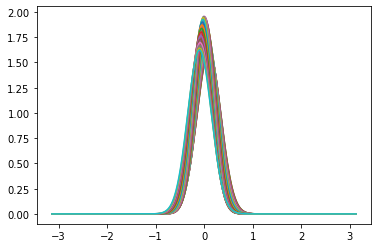

0.09999999999999998


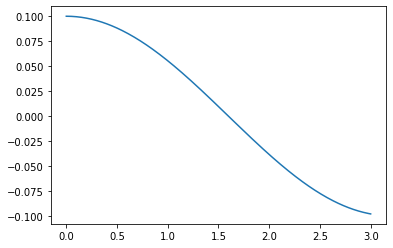

[ 0.        +0.j -0.00096712+0.j -0.00193414+0.j -0.00290098+0.j
 -0.00386755+0.j -0.00483374+0.j -0.00579948+0.j -0.00676466+0.j
 -0.0077292 +0.j -0.008693  +0.j -0.00965597+0.j -0.01061802+0.j
 -0.01157906+0.j -0.01253899+0.j -0.01349773+0.j -0.01445518+0.j
 -0.01541125+0.j -0.01636585+0.j -0.01731889+0.j -0.01827028+0.j
 -0.01921992+0.j -0.02016773+0.j -0.02111361+0.j -0.02205748+0.j
 -0.02299924+0.j -0.02393881+0.j -0.02487609+0.j -0.02581099+0.j
 -0.02674342+0.j -0.0276733 +0.j -0.02860054+0.j -0.02952504+0.j
 -0.03044672+0.j -0.03136548+0.j -0.03228125+0.j -0.03319393+0.j
 -0.03410343+0.j -0.03500967+0.j -0.03591255+0.j -0.036812  +0.j
 -0.03770792+0.j -0.03860023+0.j -0.03948884+0.j -0.04037367+0.j
 -0.04125463+0.j -0.04213163+0.j -0.04300459+0.j -0.04387343+0.j
 -0.04473806+0.j -0.0455984 +0.j -0.04645436+0.j -0.04730586+0.j
 -0.04815282+0.j -0.04899515+0.j -0.04983278+0.j -0.05066561+0.j
 -0.05149358+0.j -0.0523166 +0.j -0.05313459+0.j -0.05394747+0.j
 -0.05475516+0.j -0.05555

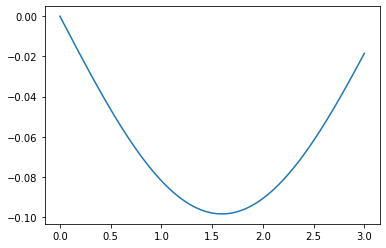

In [92]:
#centered at zero, attempt
#Particle on ring Dimensionless


#variables
Omeg0=1.0
Omeg1=1.0
eps=0.0
ntild=10#ntild = 1 is quantum, ntild>>1 is classical
dt=0.01
nsteps=300
isteps=800

t0=0
theta0=0+0.1
thetamin=-np.pi
thetamax=np.pi
k=1j

#dependent variables
dtheta=(2*thetamax)/isteps
sigma=0.5

#initial arrays 
theta=np.zeros(isteps)
drv=np.zeros(nsteps+1)
t=np.zeros(nsteps+1)
   
for n in range(nsteps+1):#t,drv array, drv is drive force
    tn=t0+(n)*dt
    t[n]=tn
    drvn=np.cos(Omeg1*tn)
    drv[n]=drvn

T=np.zeros(isteps,np.complex)#wave packet array

for i in range(0,isteps):#theta,initial wave packet array T
    thetai=thetamin+(i)*dtheta
    theta[i]=thetai
    Ti=np.exp((-0.0*k*thetai)+(-1)*((thetai-theta0)**2)/(sigma)**2)
    T[i]=Ti
    
#probibility here, to normalize
Total=np.sum(np.abs(T)**2)*dtheta
T=T/(np.sqrt(Total))
#make array of arrays of T
Tn=[]
Tn.append(T)

#definitions of coeffients
def a(drv,theta):
    a1=((1/(ntild*2*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return a1
def b(drv,theta):
    b1=((k/(Omeg0*dt))+(1/(ntild*2*(dtheta)**2))+((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n])**2/4)-(ntild*np.cos(theta)/2))#cos has flipped signs, fix this and correct the potential
    return b1 
def c(drv,theta):
    c1=((1/(ntild*2*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return c1

def a_1(drv,theta):
    a_11=((1/(ntild*2*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return a_11
def b_1(drv,theta):
    b_11=((k/(Omeg0*dt))-(1/(ntild*2*(dtheta)**2))-((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n+1])**2/4)+(ntild*np.cos(theta)/2))#cos has flipped signs, fix this and correct the potential
    return b_11
def c_1(drv,theta):
    c_11=((1/(ntild*2*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return c_11

def CrankNicolson(T,n):#Crank nicolson solver with periodic boundary conditions
    RHS=np.zeros(isteps,np.complex)#RHS
    for i in range(-1,isteps-1):
        temp1=-a(drv,theta[i])
        temp2=b(drv,theta[i])
        temp3=-c(drv,theta[i])
        RHS[i]=temp1*T[i+1]+temp2*T[i]+temp3*T[i-1]
    D=np.matrix(RHS).T#made matrix for the RHS
    d=np.zeros((isteps,isteps),np.complex)#LHS
    for i in range(-1,isteps-1):
        d[i,i]=b_1(drv,theta[i])
        d[i,i+1]=a_1(drv,theta[i])
        d[i,i-1]=c_1(drv,theta[i])
    d=np.matrix(d)#made matrix for LHS
    I=npla.inv(d)#matrix inversion using linear algebra 
    T1=I*D
    T1=np.array(T1.T)[0]#add to array of T
    return T1

#plt.plot(theta,np.real(T))# plots initial condition
#Run for all t
for n in range(nsteps):#Plots real parts                                                                  
    T=CrankNicolson(T,n)
    Tn.append(T)
 #   plt.plot(theta,np.real(T))
    
#plt.show() 

#for T in Tn:#Plots imaginary parts
  #  plt.plot(theta,np.imag(T))

#plt.show()

#for T in Tn:#plots overall average
   # plt.plot(theta,np.abs(T)**2)
   #print(np.sum(np.abs(T)**2)*dtheta)#checking for unitarity

for n in range(0,nsteps,10):
    plt.plot(theta,np.abs(Tn[n])**2)

plt.show()

#Expecatation values

def position(theta,T):#calculates expectation value
    TA=0.
    for i in range(isteps):
        TA=TA+theta[i]*(np.abs(T[i])**2)*dtheta
    return TA

xbar=np.zeros(nsteps+1)
for n in range(nsteps+1):
    xbar[n]=np.real(position(theta,Tn[n]))
    
print(xbar[0])
plt.plot(t,xbar)
plt.show()

Exp_momentum=np.zeros((nsteps+1,2),np.complex)#angular momentum value, this works as long as Omeg0=1, which it does

def momentum(T):#calculates expectation value
    P=0.
    for i in range(-1,isteps-1):
        P=P+(1)*(-k)*(Omeg0/ntild)*np.conj(T[i])*((T[i+1]-T[i-1])/(2*dtheta))*dtheta
    return(P)

pbar=np.zeros((nsteps+1),np.complex)
#
for n in range(nsteps+1):
    pbar[n]=np.real(momentum(Tn[n]))
    Exp_momentum[n,0]=t[n]#time
    Exp_momentum[n,1]=momentum(Tn[n])#expectation value of momentum

Exp_momentum=np.matrix(Exp_momentum)#table showing time and expectation value
print(pbar)
plt.plot(t,pbar)
plt.show()

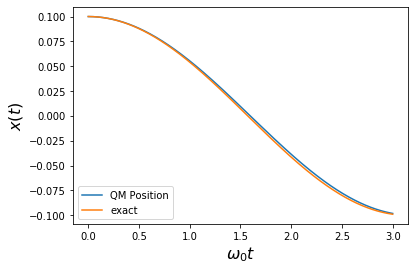

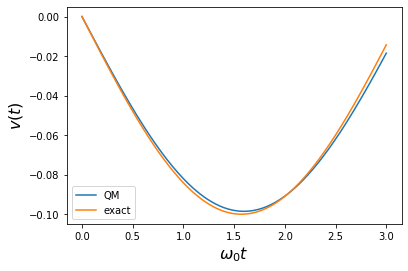

1.0


In [93]:
#exact value of pendulum
Omeg0=1.0
Omeg1=1.0
eps=0.0
time=(nsteps)*dt
x0=xbar[0]
v0=0.0
totalTime=time
xdot=np.zeros(2)

def ode_RHS(t, x):
    #xdot=np.zeros(2)
    xdot[0]=x[1]
    xdot[1]=-(1.)*Omeg0**2*np.sin((1.)*x[0])+eps*np.sin(Omeg1*t)
    return xdot

ICs=[x0,v0]
exact = si.solve_ivp(ode_RHS, (0.,totalTime),ICs,rtol=1e-6,
                        atol=1e-8,t_eval=np.linspace(0,totalTime,1001))
t=np.arange(0,4,0.4)

x1=np.linspace(0,totalTime,len(exact.t))
x2=np.linspace(0,totalTime,len(xbar))
x3=np.linspace(0,totalTime,len(t))

xbar=np.array(xbar)

SIN=np.linspace(0,totalTime,len(exact.t))

#x-axis is time, y-axis is theta
plt.plot(x2,xbar,label='QM Position')
plt.plot(x1,(1)*exact.y[0],label='exact')
#plt.plot(SIN,-(1/ntild)*np.cos((1)*SIN-np.pi)+np.pi,label='sin')#play with this more, its a bit wonky
plt.xlabel('$\omega_0 t$', fontsize=16)
plt.legend(loc='lower left')
plt.ylabel('$x(t)$', fontsize=16)

plt.show()

plt.plot(x2,pbar,label='QM')
plt.plot(x1,(1)*exact.y[1],label='exact')
plt.xlabel('$\omega_0 t$', fontsize=16)
plt.legend(loc='lower left')
plt.ylabel('$v(t)$', fontsize=16)

plt.show()

print(Omeg0)

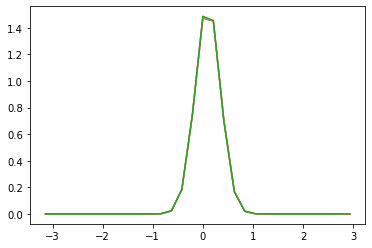

0.09999999999967714


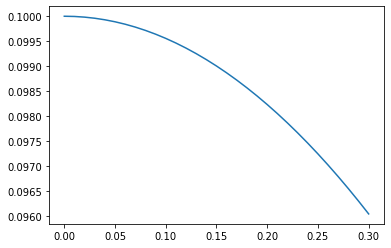

[ 0.        +0.j -0.00088438+0.j -0.00176865+0.j -0.00265271+0.j
 -0.00353645+0.j -0.00441977+0.j -0.00530257+0.j -0.00618473+0.j
 -0.00706615+0.j -0.00794673+0.j -0.00882637+0.j -0.00970495+0.j
 -0.01058238+0.j -0.01145855+0.j -0.01233335+0.j -0.01320669+0.j
 -0.01407847+0.j -0.01494857+0.j -0.0158169 +0.j -0.01668336+0.j
 -0.01754785+0.j -0.01841026+0.j -0.01927051+0.j -0.02012848+0.j
 -0.02098408+0.j -0.02183722+0.j -0.02268779+0.j -0.0235357 +0.j
 -0.02438086+0.j -0.02522317+0.j -0.02606253+0.j]


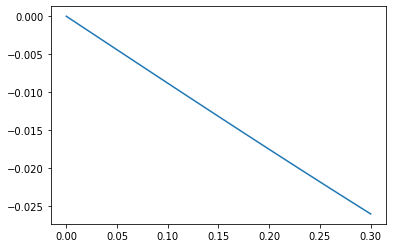

In [94]:
#Wigner/Husini function implementation
#Particle on ring Dimensionless


#variables
Omeg0=1.0
Omeg1=1.0
eps=0.0
ntild=10#ntild = 1 is quantum, ntild>>1 is classical
dt=0.01
nsteps=30
isteps=30

t0=0
theta0=0+0.1
thetamin=-np.pi
thetamax=np.pi
k=1j

#dependent variables
dtheta=(2*thetamax)/isteps
sigma=0.5

#initial arrays 
theta=np.zeros(isteps)
drv=np.zeros(nsteps+1)
t=np.zeros(nsteps+1)
   
for n in range(nsteps+1):#t,drv array, drv is drive force
    tn=t0+(n)*dt
    t[n]=tn
    drvn=np.cos(Omeg1*tn)
    drv[n]=drvn

T=np.zeros(isteps,np.complex)#wave packet array

for i in range(0,isteps):#theta,initial wave packet array T
    thetai=thetamin+(i)*dtheta
    theta[i]=thetai
    Ti=np.exp((-0.0*k*thetai)+(-1)*((thetai-theta0)**2)/(sigma)**2)
    T[i]=Ti
    
#probibility here, to normalize
Total=np.sum(np.abs(T)**2)*dtheta
T=T/(np.sqrt(Total))
#make array of arrays of T
Tn=[]
Tn.append(T)

#definitions of coeffients
def a(drv,theta):
    a1=((1/(ntild*2*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return a1
def b(drv,theta):
    b1=((k/(Omeg0*dt))+(1/(ntild*2*(dtheta)**2))+((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n])**2/4)-(ntild*np.cos(theta)/2))#cos has flipped signs, fix this and correct the potential
    return b1 
def c(drv,theta):
    c1=((1/(ntild*2*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return c1

def a_1(drv,theta):
    a_11=((1/(ntild*2*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return a_11
def b_1(drv,theta):
    b_11=((k/(Omeg0*dt))-(1/(ntild*2*(dtheta)**2))-((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n+1])**2/4)+(ntild*np.cos(theta)/2))#cos has flipped signs, fix this and correct the potential
    return b_11
def c_1(drv,theta):
    c_11=((1/(ntild*2*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return c_11

def CrankNicolson(T,n):#Crank nicolson solver with periodic boundary conditions
    RHS=np.zeros(isteps,np.complex)#RHS
    for i in range(-1,isteps-1):
        temp1=-a(drv,theta[i])
        temp2=b(drv,theta[i])
        temp3=-c(drv,theta[i])
        RHS[i]=temp1*T[i+1]+temp2*T[i]+temp3*T[i-1]
    D=np.matrix(RHS).T#made matrix for the RHS
    d=np.zeros((isteps,isteps),np.complex)#LHS
    for i in range(-1,isteps-1):
        d[i,i]=b_1(drv,theta[i])
        d[i,i+1]=a_1(drv,theta[i])
        d[i,i-1]=c_1(drv,theta[i])
    d=np.matrix(d)#made matrix for LHS
    I=npla.inv(d)#matrix inversion using linear algebra 
    T1=I*D
    T1=np.array(T1.T)[0]#add to array of T
    return T1

#plt.plot(theta,np.real(T))# plots initial condition
#Run for all t
for n in range(nsteps):#Plots real parts                                                                  
    T=CrankNicolson(T,n)
    Tn.append(T)
 #   plt.plot(theta,np.real(T))
    
#plt.show() 

#for T in Tn:#Plots imaginary parts
  #  plt.plot(theta,np.imag(T))

#plt.show()

#for T in Tn:#plots overall average
   # plt.plot(theta,np.abs(T)**2)
   #print(np.sum(np.abs(T)**2)*dtheta)#checking for unitarity

for n in range(0,nsteps,10):
    plt.plot(theta,np.abs(Tn[n])**2)

plt.show()

#Expecatation values

def position(theta,T):#calculates expectation value
    TA=0.
    for i in range(isteps):
        TA=TA+theta[i]*(np.abs(T[i])**2)*dtheta
    return TA

xbar=np.zeros(nsteps+1)
for n in range(nsteps+1):
    xbar[n]=np.real(position(theta,Tn[n]))
    
print(xbar[0])
plt.plot(t,xbar)
plt.show()

#angular momentum value, this works as long as Omeg0=1, which it does

def momentum(T):#calculates expectation value
    P=0.
    for i in range(-1,isteps-1):
        P=P+(1)*(-k)*(Omeg0/ntild)*np.conj(T[i])*((T[i+1]-T[i-1])/(2*dtheta))*dtheta
    return(P)

pbar=np.zeros((nsteps+1),np.complex)
#
for n in range(nsteps+1):
    pbar[n]=np.real(momentum(Tn[n]))
    Exp_momentum[n,0]=t[n]#time
    Exp_momentum[n,1]=momentum(Tn[n])#expectation value of momentum

Exp_momentum=np.matrix(Exp_momentum)#table showing time and expectation value
print(pbar)
plt.plot(t,pbar)
plt.show()


In [100]:
#husini function


Omegamax=max(pbar)
Omegamin=min(pbar)
Omega0=0
msteps=len(theta)
domega= (2*Omegamin)/osteps
print(Omegamin)

#need to fix the calcualtion of omega periodic boundary conditions

Omega=np.zeros(msteps,np.complex)#calculation of omega
for m in range(0,msteps):
    Omegam=Omega0+(m)*domega
    Omega[m]=Omegam
    Omega[m]=((Omega[m]+np.abs(Omegamin))%(2*np.abs(Omegamin))-np.abs(Omegamin))

#print(len(theta))
#print(len(Tn))
#print(len(Omega))
#print(nsteps)
#Omega=pbar

#Husini function 
def I(Omega,theta,T):
    for i in range(isteps):
        I=T[i]*np.exp((k*ntild*Omega*x)-(((theta-x)**2)/(4*(dtheta**4))))
    return I#this is for simplicty to define the I function

I_int=np.zeros(nsteps,np.complex)
for m in range(msteps):
    for i in range(isteps):
        for n in range(nsteps):
            I_intn=si.simps(I(Omega[m],theta[i],Tn[n]))
            I_int[n]=I_intn



print(I_int)
#fix this, we are getting an operand error because T and omega have diffrent shapes... figure out that loop

(-0.026062532529383967+0j)


TypeError: ufunc 'remainder' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''